In [1]:
from platform import python_version
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


def rysuj_wykres(punkty):
    plt.plot(punkty['x'], punkty['y'], 'o')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.axhline(y=0, color="black")
    plt.axvline(color="black")

    if np.max(punkty['y']) > np.max(punkty['x']):
        plt.ylim(np.min(punkty['y'])-5, np.max(punkty['y'])+5)
        plt.xlim(np.min(punkty['y'])-5, np.max(punkty['y'])+5)
    else:
        plt.ylim(np.min(punkty['x'])-5, np.max(punkty['x'])+5)
        plt.xlim(np.min(punkty['x'])-5, np.max(punkty['x'])+5)

    for i, x in enumerate(punkty.values):
        #print(i,x)
        plt.annotate(i, x[0:2])

    # plt.show()


def na_lewo(A, B, C):
    Ax = A[0]
    Ay = A[1]
    Bx = B[0]
    By = B[1]
    Cx = C[0]
    Cy = C[1]
    print('Ax: ', Ax, ' Ay: ', Ay, ' Bx: ', Bx,
          '  By: ', By, ' Cx: ', Cx, '  Cy : ', Cy)
    odejmowanie1 = (Cx-Bx)
    odejmowanie2 = (Ay-By)
    odejmowanie3 = (Ax-Bx)
    odejmowanie4 = (Cy-By)

    mnozenie1 = odejmowanie1*odejmowanie2
    mnozenie2 = odejmowanie3*odejmowanie4

    rownanie = mnozenie1-mnozenie2
    #wzor((Cx-Bx)*(Ay-By))-((Ax-Bx)*(Cy-By))

    print('wynik rownania: ', rownanie)

    if(rownanie > 0):
        print('na lewo')
        return True
    if(rownanie < 0):
        print('na prawo')
        return False
    if(rownanie == 0):
        print('blad')
        return 'blad'

#na_lewo([-2.0, -20.0],[-2.0, -20.0],[-2.0, -20.0])


def rysuj_otoczke(punkty, zbior_cosinusow):
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.axhline(y=0, color="black")
    plt.axvline(color="black")

    if len(punkty) == 1:
        plt.plot(punkty['x'], punkty['y'])
        for i, x in enumerate(punkty.values):
            plt.annotate(i, x[0:2])
        wspolrzedne = x[0:2]
        tytul = 'Otoczką jest punkt o współrzędnych: ' + \
            str(wspolrzedne[0])+', '+str(wspolrzedne[1])
        plt.title(tytul)
        return 1

    if len(punkty) == 2:
        plt.plot(punkty['x'], punkty['y'])
        tytul = 'Otoczką jest odcinek 01: '
        for i, x in enumerate(punkty.values):
            plt.annotate(i, x[0:2])
            wspolrzedne = x[0:2]
            if i == 0:
                tytul = tytul + \
                    str(i)+'('+str(wspolrzedne[0])+', '+str(wspolrzedne[1])+')'
            else:
                tytul = tytul+', ' + \
                    str(i)+'('+str(wspolrzedne[0])+', '+str(wspolrzedne[1])+')'
        plt.title(tytul)
        return 1

    if len(punkty) == 3:
        plt.plot(punkty['x'], punkty['y'])
        for i, x in enumerate(punkty.values):
            plt.annotate(i, x[0:2])
        wspolrzedne = x[0:2]
        tytul = 'Otoczką jest trojkąt'
        plt.title(tytul)

    pierwszy_punkt = punkty.iloc[0]
    d = [{'x': punkty['x'][0], 'y': punkty['y'][0]}]
    dodaj_na_koniec = pd.DataFrame(d)
    linie = pd.concat([punkty, dodaj_na_koniec], ignore_index=True)
    plt.plot(linie['x'], linie['y'])
    plt.plot(zbior_cosinusow['x'], zbior_cosinusow['y'], 'o')

    if np.max(punkty['y']) > np.max(punkty['x']):
        plt.ylim(np.min(punkty['y'])-5, np.max(punkty['y'])+5)
        plt.xlim(np.min(punkty['y'])-5, np.max(punkty['y'])+5)
    else:
        plt.ylim(np.min(punkty['x'])-5, np.max(punkty['x'])+5)
        plt.xlim(np.min(punkty['x'])-5, np.max(punkty['x'])+5)

    for i, x in enumerate(punkty.values):
        print(i, x)
        plt.annotate(i, x[0:2])

    ilosc_punktow = len(punkty)
    tytul = 'Otoczką jest wielokąt o ilości boków: '+str(ilosc_punktow)
    plt.title(tytul)
    #print(len(punkty))

    plt.show()


In [2]:
punkty = pd.read_csv('punkty1.csv')
punkty

,x,y
0,0.0,0
1,10.0,0
2,10.0,10
3,0.0,10
4,12.5,5


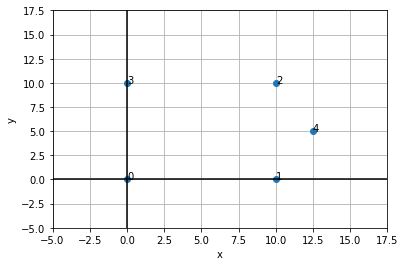

In [3]:
rysuj_wykres(punkty)

In [4]:
#sortowanie po x
posortowane_y=punkty.copy().sort_values(by=['y'],ignore_index=True)

ilosc_y=posortowane_y[posortowane_y['y']==posortowane_y['y'][0]]

#jesli wiecej niz jedna wartosc
#print(ilosc_y)

if len(ilosc_y)==1:
    posortowany_zbior=posortowane_y
else:
    posortowane_powtorzenia=posortowane_y.copy().sort_values(by=['x'],ignore_index=True)
    #zamienianie posortowanych
    zduplikowany_zbior=pd.concat([ilosc_y, posortowane_y], axis=0, ignore_index=False)
    #usun zduplikowane
    posortowany_zbior=zduplikowany_zbior.drop_duplicates()
    
posortowany_zbior=posortowany_zbior.drop_duplicates()
posortowany_zbior

,x,y
0,0.0,0
1,10.0,0
2,12.5,5
3,10.0,10
4,0.0,10


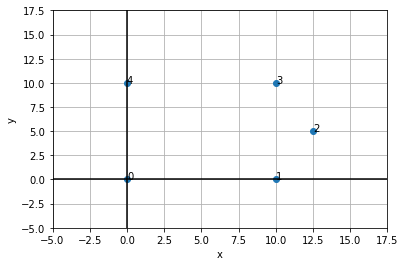

In [5]:
rysuj_wykres(posortowany_zbior)

In [6]:
S=posortowany_zbior.iloc[0]
lista_cosinusow=[1.01]

for i in posortowany_zbior[1:].values:
    Sx=S[0]
    Sy=S[1]
    Xx=i[0]
    Xy=i[1]

    #print('punkty: ',Sx,Sy,Xx,Xy)

    licznik=(Xx-Sx)
    rownanie=(Xx**2+((-2)*Xx*Sx)+Sx**2+Xy**2+((-2)*Xy*Sy)+Sy**2)
    mianownik=math.sqrt(rownanie)


    cos_alfa=licznik/mianownik
    #print('Cosinus:', cos_alfa)
    lista_cosinusow.append(cos_alfa)
    cosinusy=pd.DataFrame(lista_cosinusow, columns=['cos'])
    
#mergowanie
if(len(posortowany_zbior)>1):
    zmergowany_zbior= pd.merge(posortowany_zbior,cosinusy,left_index=True,right_index=True)
else:
    cosinusy=pd.DataFrame(lista_cosinusow, columns=['cos'])
    zmergowany_zbior= pd.merge(posortowany_zbior,cosinusy,left_index=True,right_index=True)

#sortowanie
zbior_cosinusow=zmergowany_zbior.sort_values(by=['cos','x'],ignore_index=True,ascending=False)

#powtorzenia
#zbior_cosinusow=zbior_cosinusow[zbior_cosinusow['cos']==zbior_cosinusow['cos']]

#zbior_cosinusow['duplicate'] = zbior_cosinusow.groupby('cos')['cos'].cumcount()
#zbior_cosinusow.sort_values(by=['duplicate', 'x'], inplace=True)
#df = zbior_cosinusow.duplicated(subset=['cos'])
#zbior_cosinusow=zbior_cosinusow.sort_values(by=['cos','C'],ignore_index=True,ascending=False)
lista_powtorzen=[]

    
#lista_powtorzen

zbior_cosinusow['cos']=zbior_cosinusow['cos'].apply(lambda x: np.round(x,6))

#zbior_cosinusow=zbior_cosinusow['cos'].round(decimals = 2)
zbior_cosinusow['duplicate_cos'] = zbior_cosinusow.groupby('cos')['x'].cumcount()


print(zbior_cosinusow)

for i,x in enumerate(zbior_cosinusow.values):
    pomoc=zbior_cosinusow.iloc[i]
    if float(x[3])!=float(0):
        print(x[3])
        zbior_cosinusow.iloc[i]=zbior_cosinusow.iloc[i-1]
        zbior_cosinusow.iloc[i-1]=pomoc

zbior_cosinusow

      x   y       cos  duplicate_cos
0   0.0   0  1.010000              0
1  10.0   0  1.000000              0
2  12.5   5  0.928477              0
3  10.0  10  0.707107              0
4   0.0  10  0.000000              0


,x,y,cos,duplicate_cos
0,0.0,0,1.010000,0
1,10.0,0,1.000000,0
2,12.5,5,0.928477,0
3,10.0,10,0.707107,0
4,0.0,10,0.000000,0


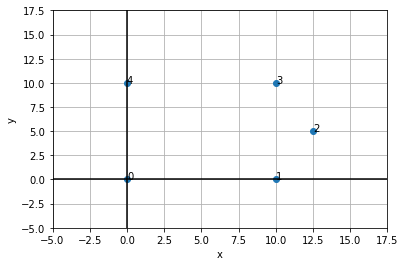

In [7]:
rysuj_wykres(zbior_cosinusow)

In [8]:
#stos próba 3

CH=[]
for i in zbior_cosinusow[0:2].values:
    CH.append([i[0],i[1]])
    
if len(zbior_cosinusow)>2:

    CH.append([zbior_cosinusow.iloc[2]['x'],zbior_cosinusow.iloc[2]['y']])

    print('CH: ',CH)

    i=3
    n=len(zbior_cosinusow)


    for i in range(i,n):

        print(CH, i)
        czy_na_lewo=na_lewo(CH[-1],CH[-3],CH[-2])
        while (czy_na_lewo==False or czy_na_lewo=='blad'):
            czy_na_lewo=na_lewo(CH[-1],CH[-3],CH[-2])
            if czy_na_lewo==True:
                break
            if(czy_na_lewo!='blad'):
                usuwam=CH.pop(-2)
                print('Usuwam ', usuwam)
            if(czy_na_lewo=='blad'):
                usuwam=CH.pop(-3)
                print('Usuwam ', usuwam)
        CH.append([zbior_cosinusow.iloc[i]['x'],zbior_cosinusow.iloc[i]['y']])
    
    
CH

CH:  [[0.0, 0.0], [10.0, 0.0], [12.5, 5.0]]
[[0.0, 0.0], [10.0, 0.0], [12.5, 5.0]] 3
Ax:  12.5  Ay:  5.0  Bx:  0.0   By:  0.0  Cx:  10.0   Cy :  0.0
wynik rownania:  50.0
na lewo
[[0.0, 0.0], [10.0, 0.0], [12.5, 5.0], [10.0, 10.0]] 4
Ax:  10.0  Ay:  10.0  Bx:  10.0   By:  0.0  Cx:  12.5   Cy :  5.0
wynik rownania:  25.0
na lewo


[[0.0, 0.0], [10.0, 0.0], [12.5, 5.0], [10.0, 10.0], [0.0, 10.0]]

In [9]:
for i in enumerate(CH):
    print(i[1])

otoczka=pd.DataFrame(CH, columns=['x','y'],)
otoczka=otoczka.drop_duplicates()

[0.0, 0.0]
[10.0, 0.0]
[12.5, 5.0]
[10.0, 10.0]
[0.0, 10.0]


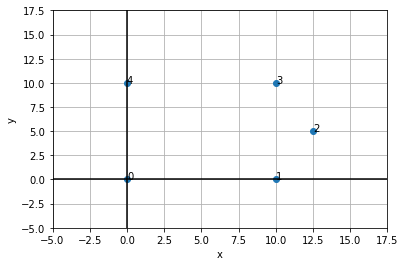

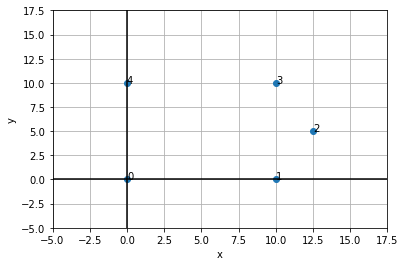

In [10]:
rysuj_wykres(otoczka)
rysuj_wykres(zbior_cosinusow)

0 [0. 0.]
1 [10.  0.]
2 [12.5  5. ]
3 [10. 10.]
4 [ 0. 10.]


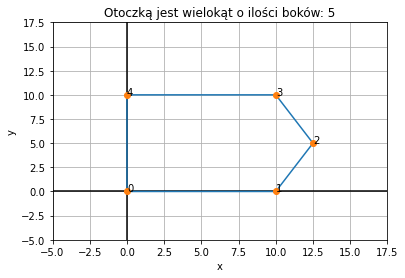

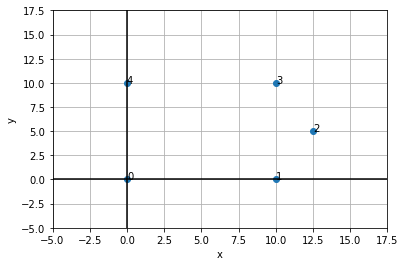

In [11]:
rysuj_otoczke(otoczka,zbior_cosinusow)
rysuj_wykres(zbior_cosinusow)